In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
import pyfolio as pf
from scipy import stats
import sys
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

D:\anaconda\lib\site-packages\pyfolio\pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
sys.path.insert(0, r'C:\Users\xuanh\Documents\hx')
from functions_cache import *

In [3]:
position_df_M = pd.read_csv('position_df_M.csv', index_col='Trading_Day', parse_dates=True)
position_df_SR = pd.read_csv('position_df_SR.csv', index_col='Trading_Day', parse_dates=True)
return_df_M = pd.read_csv('return_df_M.csv', index_col='Trading_Day', parse_dates=True)
return_df_SR = pd.read_csv('return_df_SR.csv', index_col='Trading_Day', parse_dates=True)

In [4]:
position_df_M.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-05,-0.890531,-0.890531,-0.890531,0.890531,0.890531,0.890531,0.890531,0.890531,-0.890531,-0.890531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-08,-0.864676,-0.864676,-0.864676,-0.864676,-0.864676,-0.864676,-0.864676,-0.864676,-0.864676,-0.864676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-09,-0.868528,-0.868528,-0.868528,-0.868528,-0.868528,-0.868528,-0.868528,-0.868528,-0.868528,-0.868528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-10,-0.891098,-0.891098,-0.891098,-0.891098,-0.891098,-0.891098,-0.891098,-0.891098,-0.891098,-0.891098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-11,-0.883420,-0.883420,-0.883420,-0.883420,-0.883420,-0.883420,-0.883420,-0.883420,-0.883420,-0.883420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
return_df_M.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-08,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-09,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,0.000308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-10,-0.006643,-0.006643,-0.006643,-0.006643,-0.006643,-0.006643,-0.006643,-0.006643,-0.006643,-0.006643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-11,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-12,-0.013512,-0.013512,0.013512,0.013512,0.013512,0.013512,0.013512,0.013512,0.013512,0.013512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
position_df_SR.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-23,1.354580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,-1.480976,1.502844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-25,1.488824,1.479845,1.562550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-26,-1.506889,1.480662,1.556082,1.481218,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,1.547284,1.515891,1.571980,1.516239,1.565346,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
return_df_SR.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-23,0.004664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,0.009059,-0.009192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-25,-0.000223,-0.000222,-0.000235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-26,0.003620,-0.003557,-0.003738,-0.003558,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,-0.021655,-0.021216,-0.022001,-0.021220,-0.021908,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop trading days with only one symbol

In [8]:
# since M started earlier than SR, reindex M by the index of SR
return_df_M = return_df_M.reindex(return_df_SR.index)
return_df_M.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-23,0.002537,0.002537,0.002537,-0.002537,-0.002537,0.002537,0.002537,0.002537,0.002537,0.002537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,-0.002957,0.002957,0.002957,0.002957,-0.002957,-0.002957,0.002957,0.002957,0.002957,0.002957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-25,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,-0.000330,0.000330,0.000330,0.000330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-26,0.011085,0.011085,0.011085,0.011085,0.011085,0.011085,0.011085,0.011085,0.011085,0.011085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,0.029775,0.029775,0.029775,0.029775,0.029775,0.029775,0.029775,0.029775,0.029775,0.029775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(return_df_SR.shape)
print(return_df_M.shape)

(460, 630)
(460, 630)


In [10]:
# replacing values by nan on position where SR does not have records
return_df_M = return_df_M + return_df_SR
return_df_M = return_df_M - return_df_SR
return_df_M.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-23,0.002537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,-0.002957,0.002957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-25,0.000330,0.000330,0.000330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-26,0.011085,0.011085,0.011085,0.011085,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,0.029775,0.029775,0.029775,0.029775,0.029775,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# repeat the same process 
position_df_M = position_df_M.reindex(position_df_SR.index)
position_df_M = position_df_M + position_df_SR
position_df_M = position_df_M - position_df_SR
position_df_M.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-23,-0.872096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,0.900973,-0.900973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-25,-0.900636,-0.900636,-0.900636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-26,-0.946403,-0.946403,-0.946403,-0.946403,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,-0.924056,-0.924056,-0.924056,-0.924056,-0.924056,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate the mean non-slippage return

In [12]:
# calculate the mean return by brutely adding up two dataframes, since we've adjusted the weight by volatility
return_df_mean = return_df_M.add(return_df_SR) / 2
return_df_mean.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2017-05-23,0.003600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,0.003051,-0.003118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-25,0.000053,0.000054,0.000047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-26,0.007352,0.003764,0.003674,0.003764,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,0.004060,0.004280,0.003887,0.004277,0.003934,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlation

In [13]:
# use the correlation matrix to do clustering
correlation = return_df_mean.corr()
#correlation.to_csv('correlation.csv')
correlation.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,54_10,55_10,56_10,57_10,58_10,59_10,60_10,61_10,62_10,63_10
1_1,1.000000,0.580790,0.381975,0.302997,0.333930,0.208063,0.207278,0.219789,0.241544,0.238337,...,0.182106,0.177580,0.175948,0.176391,0.148846,0.145154,0.134993,0.130041,0.114006,0.103223
2_1,0.580790,1.000000,0.677370,0.599921,0.595491,0.483829,0.452120,0.489203,0.478490,0.440212,...,0.246257,0.250028,0.241864,0.243801,0.204626,0.203130,0.206588,0.194958,0.197300,0.191642
3_1,0.381975,0.677370,1.000000,0.809437,0.723956,0.593121,0.522309,0.538975,0.532449,0.526833,...,0.110217,0.113200,0.094806,0.095832,0.103601,0.103228,0.119628,0.121870,0.135032,0.138070
4_1,0.302997,0.599921,0.809437,1.000000,0.789707,0.659837,0.604615,0.570220,0.536478,0.527722,...,0.095719,0.102515,0.084918,0.092500,0.102598,0.104365,0.128226,0.135902,0.156417,0.162565
5_1,0.333930,0.595491,0.723956,0.789707,1.000000,0.790862,0.713152,0.683697,0.664941,0.636256,...,0.134446,0.135784,0.122752,0.119394,0.111613,0.105335,0.110087,0.103100,0.113524,0.109160


## K-means

Text(0.5,0,'n_clusters')

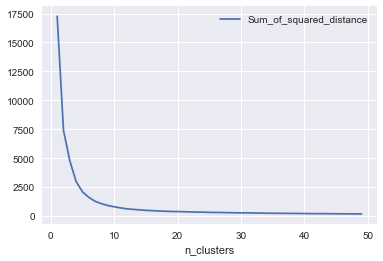

In [47]:
# find the best number of clusters
n_clusters = np.arange(1, 50)
models = [KMeans(n_clusters=n, init='random', n_init=100).fit(correlation) for n in n_clusters]
plt.plot(n_clusters, [m.inertia_ for m in models], label='Sum_of_squared_distance')
plt.legend(loc='best')
plt.xlabel('n_clusters')

In [14]:
# the elbow point is approximately 10 
n_clusters = 10
kmeans_result = k_means_clustering(correlation, n_clusters)
                                   
for i in range(n_clusters):
    print(kmeans_result.loc[i].dropna().values)
    print('\n')

score:  -803.7027386306327

['26_1' '27_1' '28_1' '29_1' '30_1' '31_1' '32_1' '25_2' '26_2' '27_2'
 '28_2' '29_2' '30_2' '31_2' '25_3' '26_3' '27_3' '28_3' '29_3' '30_3'
 '31_3' '24_4' '25_4' '26_4' '27_4' '28_4' '29_4' '30_4' '23_5' '24_5'
 '25_5' '26_5' '27_5' '28_5' '23_6' '24_6' '25_6' '26_6' '27_6' '22_7'
 '23_7' '24_7' '25_7' '26_7' '21_8' '22_8' '23_8' '24_8' '25_8' '21_9'
 '22_9' '23_9' '24_9' '25_9' '20_10' '21_10' '22_10' '23_10' '24_10']


['59_1' '60_1' '61_1' '62_1' '63_1' '59_2' '60_2' '61_2' '62_2' '63_2'
 '59_3' '60_3' '61_3' '62_3' '63_3' '59_4' '60_4' '61_4' '62_4' '63_4'
 '58_5' '59_5' '60_5' '61_5' '62_5' '63_5' '58_6' '59_6' '60_6' '61_6'
 '62_6' '63_6' '58_7' '59_7' '60_7' '61_7' '62_7' '63_7' '57_8' '58_8'
 '59_8' '60_8' '61_8' '62_8' '63_8' '57_9' '58_9' '59_9' '60_9' '61_9'
 '62_9' '63_9' '56_10' '57_10' '58_10' '59_10' '60_10' '61_10' '62_10'
 '63_10']


['23_1' '24_1' '25_1' '22_2' '23_2' '24_2' '21_3' '22_3' '23_3' '24_3'
 '21_4' '22_4' '23_4' '20_5' '21_5' 

In [15]:
# holding days are chosen between 1 and 10, momentum loolbacks days are chosen between 1 and 63.
holding_days_list = [i for i in range(1, 11)]
skip_recent = 0
mom_lookback_list = [i for i in range(1, 64)]
kmeans_cluster_df = pd.DataFrame(np.nan, index=mom_lookback_list, columns=holding_days_list)
kmeans_cluster_df.index.name = 'mom_lookback'
kmeans_cluster_df.columns.name = 'holding_days'
for cluster in kmeans_result.index:
    for strategy in (kmeans_result.loc[cluster, :]).dropna():
        mom_lookback = int(strategy.split('_')[0])
        holding_days = int(strategy.split('_')[1])
        kmeans_cluster_df.loc[mom_lookback, holding_days] = int(cluster)
        
kmeans_cluster_df.iloc[:-1, :].style.apply(background_gradient_Paired, cmin=0, cmax=n_clusters-1, axis=None)

holding_days,1,2,3,4,5,6,7,8,9,10
mom_lookback,,,,,,,,,,
1,4,4,4,4,4,4,4,6,6,6
2,4,4,4,4,4,6,6,6,6,6
3,4,4,4,4,6,6,6,6,6,6
4,4,4,4,6,6,6,6,6,9,9
5,4,6,6,6,6,6,6,9,9,9
6,4,6,6,6,6,6,9,9,9,9
7,4,6,6,6,9,9,9,9,9,9
8,6,6,6,6,9,9,9,9,9,9
9,6,6,6,9,9,9,9,9,9,9


## Return after clustering

In [16]:
daily_change_df_M = pd.read_csv('daily_change_df_M.csv', index_col='Trading_Day', parse_dates=True)
daily_change_df_SR = pd.read_csv('daily_change_df_SR.csv', index_col='Trading_Day', parse_dates=True)

In [17]:
daily_change_df_M.head()

,call_interest,put_interest,put_call_ratio,adjusted_future_price,return
Trading_Day,,,,,
2017-04-05,NaN,NaN,NaN,2502.513520,NaN
2017-04-06,103.509091,86.381818,0.004272,2501.605167,-0.000363
2017-04-07,168.000000,238.727273,0.071238,2478.896332,-0.009078
2017-04-10,245.636364,227.454545,0.009979,2508.871993,0.012092
2017-04-11,144.181818,157.090909,0.017110,2508.871993,0.000000


In [18]:
daily_change_df_SR.head()

,call_interest,put_interest,put_call_ratio,adjusted_future_price,return
Trading_Day,,,,,
2017-04-20,NaN,NaN,NaN,6433.997709,NaN
2017-04-21,94.181818,45.454545,-0.029769,6411.245986,-0.003536
2017-04-24,105.636364,161.090909,0.078449,6323.083059,-0.013751
2017-04-25,-48.181818,-67.712121,-0.027931,6295.591393,-0.004348
2017-04-26,101.000000,3.666667,-0.070316,6314.551162,0.003012


In [19]:
kmeans_mean_pos_M = pd.DataFrame(index=return_df_mean.index, columns=kmeans_result.index)
kmeans_mean_ret_M = kmeans_mean_pos_M.copy()
kmeans_mean_pos_SR = kmeans_mean_pos_M.copy()
kmeans_mean_ret_SR = kmeans_mean_pos_M.copy()
# assume the slippage to be .0005
slippage_percent = 0.0005

for group_label in kmeans_result.index:
    strategy_group = kmeans_result.loc[group_label, :].dropna().values
    # the average return of strategies in the same group
    pos_M = (position_df_M[strategy_group]).mean(axis=1)
    kmeans_mean_pos_M[group_label] = pos_M
    kmeans_mean_ret_M[group_label] = pos_M * daily_change_df_M['return'] - slippage(pos_M, slippage_percent)
    
    pos_SR = (position_df_SR[strategy_group]).mean(axis=1)
    kmeans_mean_pos_SR[group_label] = pos_SR
    kmeans_mean_ret_SR[group_label] = pos_SR * daily_change_df_SR['return'] - slippage(pos_SR, slippage_percent)

In [20]:
kmeans_mean_pos_M.head()

,0,1,2,3,4,5,6,7,8,9
Trading_Day,,,,,,,,,,
2017-05-23,NaN,NaN,NaN,NaN,-0.280328,NaN,-0.092410,NaN,NaN,NaN
2017-05-24,NaN,NaN,NaN,NaN,-0.053668,NaN,-0.071389,NaN,NaN,NaN
2017-05-25,NaN,NaN,NaN,NaN,-0.507839,NaN,-0.156368,NaN,NaN,NaN
2017-05-26,NaN,NaN,NaN,NaN,-0.754067,NaN,-0.243808,NaN,NaN,-0.342939
2017-05-31,NaN,NaN,NaN,NaN,-0.840465,NaN,-0.396239,NaN,NaN,-0.201506


In [21]:
kmeans_mean_pos_SR.head()

,0,1,2,3,4,5,6,7,8,9
Trading_Day,,,,,,,,,,
2017-05-23,NaN,NaN,NaN,NaN,0.237366,NaN,-0.436313,NaN,NaN,NaN
2017-05-24,NaN,NaN,NaN,NaN,0.014822,NaN,-0.917363,NaN,NaN,NaN
2017-05-25,NaN,NaN,NaN,NaN,0.970553,NaN,0.106991,NaN,NaN,NaN
2017-05-26,NaN,NaN,NaN,NaN,0.759659,NaN,0.267036,NaN,NaN,1.455541
2017-05-31,NaN,NaN,NaN,NaN,1.121385,NaN,0.718695,NaN,NaN,0.902531


In [22]:
# average return of SR and M
kmeans_mean_ret = (kmeans_mean_ret_SR + kmeans_mean_ret_M) / 2
kmeans_mean_ret.head(10)

,0,1,2,3,4,5,6,7,8,9
Trading_Day,,,,,,,,,,
2017-05-23,NaN,NaN,NaN,NaN,0.000687,NaN,-0.000749,NaN,NaN,NaN
2017-05-24,NaN,NaN,NaN,NaN,-0.000070,NaN,0.002797,NaN,NaN,NaN
2017-05-25,NaN,NaN,NaN,NaN,-0.000332,NaN,-0.000257,NaN,NaN,NaN
2017-05-26,NaN,NaN,NaN,NaN,0.003390,NaN,0.001045,NaN,NaN,NaN
2017-05-31,NaN,NaN,NaN,NaN,0.005582,NaN,0.001204,NaN,NaN,-0.003243
2017-06-01,NaN,NaN,NaN,NaN,0.000444,NaN,0.000579,NaN,NaN,-0.000040
2017-06-02,NaN,NaN,NaN,NaN,0.000158,NaN,0.000071,NaN,NaN,-0.000059
2017-06-05,NaN,NaN,NaN,NaN,-0.005564,NaN,-0.006123,NaN,NaN,-0.004673
2017-06-06,NaN,NaN,NaN,NaN,0.001397,NaN,0.001407,NaN,NaN,0.001245


In [23]:
columns = ['sharpe_ratio', 'annual_return', 'annual_vol']
kmeans_grade_df = pd.DataFrame(index=kmeans_result.index, columns=columns, dtype='float64')

for group_label in kmeans_result.index:
    # calculate the annual return, volatility and sharpe ratio of stategy group
    annual_return, annual_vol, sharpe_ratio = grading(kmeans_mean_ret[group_label], False)
    kmeans_grade_df.loc[group_label, 'sharpe_ratio'] = sharpe_ratio
    kmeans_grade_df.loc[group_label, 'annual_return'] = annual_return
    kmeans_grade_df.loc[group_label, 'annual_vol'] = annual_vol

In [24]:
cm = sns.light_palette("green", as_cmap=True)
df = kmeans_grade_df
s = df.style.background_gradient(cmap=cm)
s

,sharpe_ratio,annual_return,annual_vol
0,-0.410743,-0.0452914,0.110267
1,0.280961,0.0296964,0.105696
2,0.0720276,0.00741038,0.102882
3,0.00946787,0.00100341,0.105981
4,0.621814,0.0461228,0.0741747
5,-0.405044,-0.0437855,0.108101
6,-0.00499809,-0.000380988,0.0762266
7,0.430415,0.0437174,0.10157
8,0.177037,0.0185137,0.104575
9,-0.123879,-0.0108977,0.0879704


In [26]:
bestret = kmeans_mean_ret_M[4].dropna()
ret = bestret.copy(deep=True)
ret.index = ret.index.tz_localize('Asia/Shanghai')

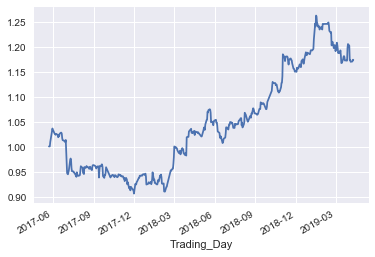

In [27]:
(bestret + 1).cumprod().plot()

Start date,2017-05-23
End date,2019-04-10
Total months,21
,Backtest
Annual return,9.2%
Cumulative returns,17.5%
Annual volatility,12.1%
Sharpe ratio,0.79
Calmar ratio,0.73
Stability,0.76
Max drawdown,-12.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,12.61,2017-05-31,2017-12-01,2018-05-08,245
1,7.54,2019-01-16,2019-03-15,NaT,NaN
2,6.31,2018-05-21,2018-06-19,2018-08-27,71
3,2.96,2018-11-02,2018-12-03,2018-12-24,37
4,1.91,2018-10-10,2018-10-24,2018-11-01,17


TypeError: 'int' object is not iterable

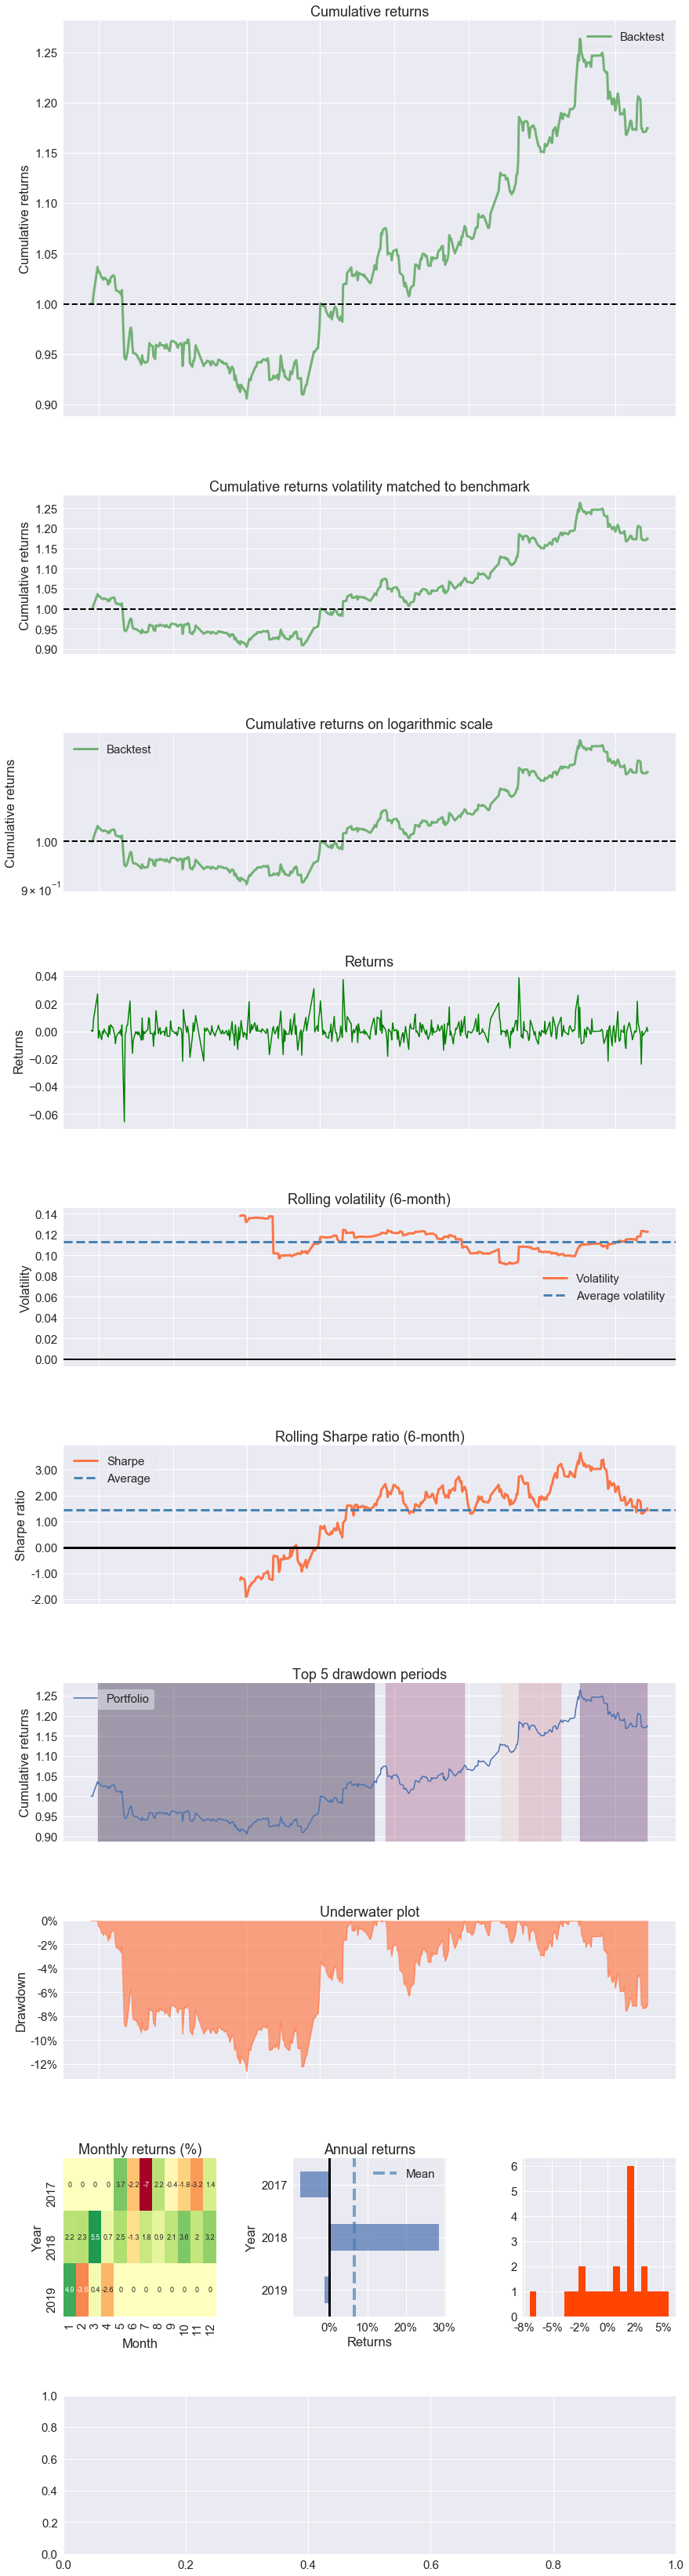

In [28]:
pf.create_returns_tear_sheet(ret)